# Análise dos dados coletados do Spotify
### Coleta realizada em: 

##### Trabalho de Conclusão de Curso - TCC


### Importação das bibliotecas e do arquivo 'dataframefinal.csv'

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Função definida para normalizar os valores
from sklearn.preprocessing import StandardScaler
def normalizar(array):
    standarlization = StandardScaler()
    return standarlization.fit_transform(array)

In [3]:
# Função para retornar um gráfito do método Elbow, com a finalidade de identificar a quantidade ideal de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def calculoElbow(array):
    wcss = []

    for i in range(1,10):
        kmeans = KMeans(n_clusters=i, init='random')
        kmeans.fit(array)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1,10),wcss)
    plt.title('O Metodo Elbow')
    plt.xlabel('numero de Clusters')
    plt.ylabel('WSS')
    plt.show()
    

In [4]:
# Leitura do arquivo
df = pd.read_csv('dataframefinal.csv')
# Remoção de colunas nao utilizadas para a análise
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', '_id', 'album', 'available_markets',
                      'disc_number','episode', 'uri', 'href', 'id', 'linked_from', 
                      'type', 'explicit','external_ids','external_urls','is_local', 'preview_url',
                     'track_number', 'track'])
# remoção de tuplas com valores NaN
df = df.dropna()
print('Tamanho do Dataframe: %d músicas' % len(df))

Tamanho do Dataframe: 42142 músicas


/home/adriano/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (10,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Jorge & Mateus,toplists,BR,175219,Tijolão - Ao Vivo,0,0.637,0.877,-3.680,0.1980,0.469,0.0,0.3430,0.691,118.889
1,Ed Sheeran,toplists,BR,206186,Cross Me (feat. Chance the Rapper & PnB Rock),0,0.746,0.787,-6.373,0.1200,0.214,0.0,0.0669,0.607,95.005
2,Paula Fernandes,toplists,BR,204000,Juntos,63,0.687,0.411,-8.619,0.0338,0.866,0.0,0.0967,0.184,101.851
3,Diego & Victor Hugo,toplists,BR,190276,Entregador de Flor - Ao Vivo em Brasília,0,0.376,0.834,-4.303,0.0800,0.549,0.0,0.4120,0.329,125.171
4,Dennis DJ,toplists,BR,224368,Megamix do Baile,0,0.847,0.847,-6.920,0.3530,0.475,0.0,0.1180,0.741,149.947


In [6]:
# Identificação da quantidade de músicas por país
df.country.value_counts()

BR    17928
FR    13040
JP    11174
Name: country, dtype: int64

In [25]:
df.groupby('country').danceability.agg(['min', 'max', 'median', 'mean', 'count'])

,min,max,median,mean,count
country,,,,,
BR,0.0,0.984,0.602,0.582822,17928
FR,0.0,0.981,0.650,0.619632,13040
JP,0.0,0.980,0.601,0.587507,11174


In [27]:
df[df.danceability > 0].groupby('country').danceability.agg(['min', 'max', 'median', 'mean', 'count'])

,min,max,median,mean,count
country,,,,,
BR,0.0536,0.984,0.602,0.583473,17908
FR,0.0603,0.981,0.650,0.619680,13039
JP,0.0578,0.980,0.601,0.587718,11170


In [29]:
df[df.danceability > 0].danceability.describe()

count    42117.000000
mean         0.595808
std          0.173853
min          0.053600
25%          0.488000
50%          0.616000
75%          0.724000
max          0.984000
Name: danceability, dtype: float64

In [40]:
dfbr = df[df.country == 'BR']
dfbr.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Jorge & Mateus,toplists,BR,175219,Tijolão - Ao Vivo,0,0.637,0.877,-3.680,0.1980,0.469,0.0,0.3430,0.691,118.889
1,Ed Sheeran,toplists,BR,206186,Cross Me (feat. Chance the Rapper & PnB Rock),0,0.746,0.787,-6.373,0.1200,0.214,0.0,0.0669,0.607,95.005
2,Paula Fernandes,toplists,BR,204000,Juntos,63,0.687,0.411,-8.619,0.0338,0.866,0.0,0.0967,0.184,101.851
3,Diego & Victor Hugo,toplists,BR,190276,Entregador de Flor - Ao Vivo em Brasília,0,0.376,0.834,-4.303,0.0800,0.549,0.0,0.4120,0.329,125.171
4,Dennis DJ,toplists,BR,224368,Megamix do Baile,0,0.847,0.847,-6.920,0.3530,0.475,0.0,0.1180,0.741,149.947


In [47]:
pd.crosstab(df.country, df.category)

category,blues,brazilian,chill,classical,comedy,country,decades,dinner,edm_dance,family,...,romance,roots,sertanejo,sessions,sleep,soul,summer,toplists,travel,workout
country,,,,,,,,,,,,,,,,,,,,,
BR,0,710,612,260,305,0,279,194,846,946,...,264,60,748,364,405,0,981,221,250,511
FR,0,140,1019,600,0,0,392,179,624,0,...,251,50,0,0,100,0,923,125,130,955
JP,122,0,255,130,0,642,702,176,501,0,...,178,0,0,0,252,167,0,196,338,284


In [45]:
dfbr.category.value_counts().head(10)

inspirational    2072
mood             1390
popculture       1279
summer            981
family            946
rock              898
edm_dance         846
sertanejo         748
party             737
brazilian         710
Name: category, dtype: int64

In [111]:
dfbr[dfbr.popularity > 60].artists.value_counts().head(10)

BTS                    58
Ed Sheeran             50
Anitta                 50
Romeo Santos           35
Alok                   31
Calvin Harris          28
Zé Neto & Cristiano    24
Ariana Grande          23
James Arthur           23
Avicii                 23
Name: artists, dtype: int64

In [178]:
df60 = dfbr[dfbr.popularity >= 80]
df60.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
61,MC Kevin o Chris,toplists,BR,204930,Ela É do Tipo,83,0.632,0.398,-6.615,0.3730,0.945,0.0,0.228,0.633,90.695
62,Gusttavo Lima,toplists,BR,203739,Cem Mil - Ao Vivo,82,0.901,0.819,-1.874,0.0510,0.309,0.0,0.701,0.924,129.935
63,João Gustavo e Murilo,toplists,BR,179164,Lençol Dobrado,81,0.707,0.664,-5.042,0.0382,0.361,0.0,0.331,0.674,124.991
64,Matheus & Kauan,toplists,BR,189059,Vou Ter Que Superar - Ao Vivo,81,0.505,0.721,-5.860,0.0610,0.768,0.0,0.869,0.421,106.248
67,Marília Mendonça,toplists,BR,175202,Bebaça - Ao Vivo,80,0.663,0.884,-3.400,0.0716,0.652,0.0,0.156,0.875,172.059


In [191]:
dfArtistaPopulares = df60.sort_values("popularity", ascending=False).drop_duplicates(subset="name")
dfArtistaPopulares

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
3946,Billie Eilish,mood,BR,194087,bad guy,100,0.701,0.425,-10.965,0.3750,0.32800,0.130000,0.1000,0.562,135.128
85,Lil Nas X,toplists,BR,157066,Old Town Road - Remix,98,0.878,0.619,-5.560,0.1020,0.05330,0.000000,0.1130,0.639,136.041
6116,Ed Sheeran,pop,BR,219946,I Don't Care (with Justin Bieber),97,0.798,0.675,-5.041,0.0442,0.09120,0.000000,0.0894,0.842,101.956
12789,Jonas Brothers,travel,BR,181040,Sucker,95,0.842,0.734,-5.065,0.0588,0.04270,0.000000,0.1060,0.952,137.958
8831,Avicii,edm_dance,BR,157202,SOS,95,0.802,0.645,-6.181,0.0715,0.27200,0.000000,0.1190,0.376,100.001
15233,Post Malone,popculture,BR,158040,Sunflower - Spider-Man: Into the Spider-Verse,95,0.760,0.479,-5.574,0.0466,0.55600,0.000000,0.0703,0.913,89.911
8457,Lil Nas X,hiphop,BR,113013,Old Town Road,95,0.908,0.517,-6.063,0.1290,0.03610,0.000002,0.0949,0.471,136.019
10319,Daddy Yankee,workout,BR,193226,Con Calma,95,0.737,0.860,-2.652,0.0593,0.11000,0.000002,0.0574,0.656,93.989
3901,Taylor Swift,mood,BR,193040,ME! (feat. Brendon Urie of Panic! At The Disco),94,0.614,0.839,-4.143,0.0702,0.02910,0.000000,0.1120,0.657,182.123
9331,Shawn Mendes,edm_dance,BR,190800,If I Can't Have You,94,0.692,0.809,-4.198,0.0602,0.52400,0.000000,0.1470,0.864,123.911


In [192]:
countArtistas = dfArtistaPopulares.artists.value_counts().head(10)
countArtistas

Ariana Grande       10
Ed Sheeran           7
BTS                  7
Martin Garrix        6
Billie Eilish        5
Post Malone          5
Marshmello           5
Juice WRLD           4
The Chainsmokers     4
Khalid               4
Name: artists, dtype: int64

In [193]:
dfbrP80 = pd.DataFrame()
dfbrP80['artist'] = pd.Series(list(countArtistas.index))
dfbrP80['qtd_music'] = pd.Series(list(countArtistas.values))

In [194]:
dfbrP80

,artist,qtd_music
0,Ariana Grande,10
1,Ed Sheeran,7
2,BTS,7
3,Martin Garrix,6
4,Billie Eilish,5
5,Post Malone,5
6,Marshmello,5
7,Juice WRLD,4
8,The Chainsmokers,4
9,Khalid,4


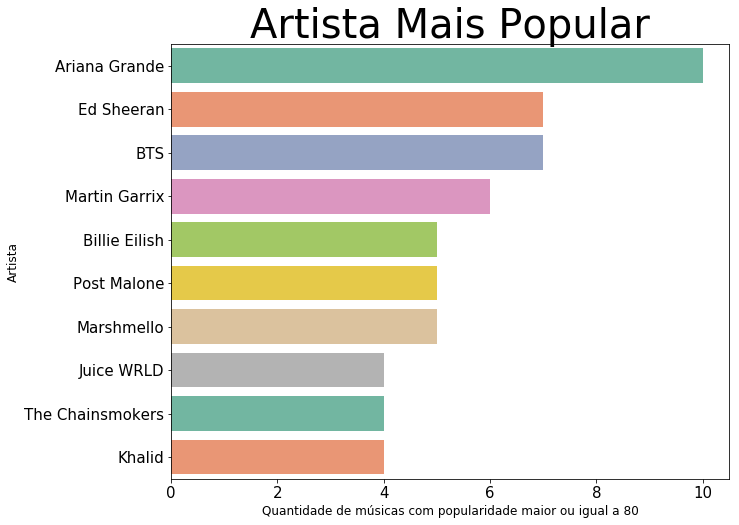

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,8))
fig.add_subplot(1,1,1)

ax = sns.barplot(y='artist', x = 'qtd_music', data=dfbrtop60, palette="Set2" )

ax.axes.set_title("Artista Mais Popular",fontsize=40)
ax.set_xlabel("Quantidade de músicas com popularidade maior ou igual a 80",fontsize=12)
ax.set_ylabel("Artista",fontsize=12)
ax.tick_params(labelsize=15)
#sns.plt.show()
plt.show()

In [196]:
dfArtistaPopulares.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
3946,Billie Eilish,mood,BR,194087,bad guy,100,0.701,0.425,-10.965,0.3750,0.3280,0.13,0.1000,0.562,135.128
85,Lil Nas X,toplists,BR,157066,Old Town Road - Remix,98,0.878,0.619,-5.560,0.1020,0.0533,0.00,0.1130,0.639,136.041
6116,Ed Sheeran,pop,BR,219946,I Don't Care (with Justin Bieber),97,0.798,0.675,-5.041,0.0442,0.0912,0.00,0.0894,0.842,101.956
12789,Jonas Brothers,travel,BR,181040,Sucker,95,0.842,0.734,-5.065,0.0588,0.0427,0.00,0.1060,0.952,137.958
8831,Avicii,edm_dance,BR,157202,SOS,95,0.802,0.645,-6.181,0.0715,0.2720,0.00,0.1190,0.376,100.001


In [212]:
frames = []
for artista in dfbrP80.artist:
    dfAux = dfArtistaPopulares[dfArtistaPopulares.artists == artista]
    frames.append(dfAux)

dfResult = pd.concat(frames)
dfResult
    

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
10314,Ariana Grande,workout,BR,178640,7 rings,91,0.725,0.321,-10.744,0.3230,0.5780,0.000000,0.0884,0.319,70.142
10310,Ariana Grande,workout,BR,190440,"break up with your girlfriend, i'm bored",91,0.726,0.554,-5.290,0.0917,0.0421,0.000000,0.1060,0.335,169.999
4703,Ariana Grande,mood,BR,205920,no tears left to cry,85,0.699,0.713,-5.507,0.0594,0.0400,0.000003,0.2940,0.354,121.993
16860,Ariana Grande,gaming,BR,197546,God is a woman,83,0.602,0.658,-5.934,0.0558,0.0233,0.000060,0.2370,0.268,145.031
4981,Ariana Grande,mood,BR,171573,needy,82,0.647,0.309,-7.948,0.0366,0.7800,0.000007,0.2020,0.195,87.045
17851,Ariana Grande,summer,BR,216893,bloodline,81,0.758,0.665,-5.188,0.0774,0.0815,0.000157,0.2160,0.643,151.976
5764,Ariana Grande,pop,BR,244453,Into You,81,0.623,0.734,-5.950,0.1070,0.0162,0.000002,0.1450,0.372,107.853
10345,Ariana Grande,workout,BR,198160,breathin,81,0.568,0.656,-5.413,0.0433,0.0211,0.000014,0.2130,0.364,100.049
5756,Ariana Grande,pop,BR,197266,One Last Time,81,0.628,0.593,-5.036,0.0323,0.0930,0.000002,0.0960,0.104,125.026
10323,Ariana Grande,workout,BR,267106,bad idea,80,0.847,0.579,-5.314,0.0719,0.0268,0.054500,0.1020,0.569,137.998


In [213]:
len(dfResult)

57

In [220]:
dfResult.groupby('artists').mean()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
artists,,,,,,,,,,,
Ariana Grande,206799.700000,83.600000,0.682300,0.578200,-6.232400,0.089840,0.170200,0.005474,0.169940,0.352300,121.711200
BTS,223144.142857,83.571429,0.582143,0.781714,-5.206000,0.169886,0.076529,0.000000,0.185214,0.507143,126.641857
Billie Eilish,204453.400000,90.600000,0.582400,0.300800,-11.992000,0.167920,0.664600,0.032150,0.230140,0.267800,119.225400
Ed Sheeran,241369.000000,85.428571,0.671714,0.615571,-5.617000,0.060514,0.287557,0.000068,0.148300,0.569286,102.131429
Juice WRLD,177629.500000,81.500000,0.630750,0.701250,-5.246500,0.133150,0.261250,0.000009,0.119500,0.569750,96.981250
Khalid,194701.500000,85.500000,0.783750,0.533000,-7.059500,0.060650,0.090525,0.000073,0.188900,0.396000,129.979250
Marshmello,178305.000000,86.600000,0.686800,0.724600,-3.150400,0.059160,0.151000,0.000001,0.147800,0.454000,107.409000
Martin Garrix,205777.833333,82.000000,0.517667,0.599333,-6.787167,0.043333,0.183900,0.000018,0.196017,0.265833,130.303833
Post Malone,185405.000000,89.600000,0.731400,0.551200,-6.235600,0.110760,0.267600,0.000014,0.129460,0.459600,118.947000


In [233]:
comp = dfResult.groupby('artists').popularity.agg(['min', 'median', 'max', 'mean', 'count'])
comp

,min,median,max,mean,count
artists,,,,,
Ariana Grande,80,81.5,91,83.600000,10
BTS,80,82.0,94,83.571429,7
Billie Eilish,80,91.0,100,90.600000,5
Ed Sheeran,80,84.0,97,85.428571,7
Juice WRLD,80,81.5,83,81.500000,4
Khalid,82,85.5,89,85.500000,4
Marshmello,82,84.0,92,86.600000,5
Martin Garrix,80,80.5,88,82.000000,6
Post Malone,83,89.0,95,89.600000,5


In [234]:
comp.sort_values("max", ascending=False)

,min,median,max,mean,count
artists,,,,,
Billie Eilish,80,91.0,100,90.600000,5
Ed Sheeran,80,84.0,97,85.428571,7
Post Malone,83,89.0,95,89.600000,5
BTS,80,82.0,94,83.571429,7
Marshmello,82,84.0,92,86.600000,5
Ariana Grande,80,81.5,91,83.600000,10
Khalid,82,85.5,89,85.500000,4
Martin Garrix,80,80.5,88,82.000000,6
The Chainsmokers,80,82.0,84,82.000000,4


In [246]:
comp['artists'] = comp.index
comp.sort_values('max')

,min,median,max,mean,count,artists
artists,,,,,,
Juice WRLD,80,81.5,83,81.500000,4,Juice WRLD
The Chainsmokers,80,82.0,84,82.000000,4,The Chainsmokers
Martin Garrix,80,80.5,88,82.000000,6,Martin Garrix
Khalid,82,85.5,89,85.500000,4,Khalid
Ariana Grande,80,81.5,91,83.600000,10,Ariana Grande
Marshmello,82,84.0,92,86.600000,5,Marshmello
BTS,80,82.0,94,83.571429,7,BTS
Post Malone,83,89.0,95,89.600000,5,Post Malone
Ed Sheeran,80,84.0,97,85.428571,7,Ed Sheeran


In [253]:
comp

AttributeError: 'function' object has no attribute 'values'

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

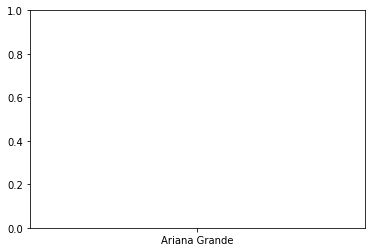

In [250]:
x = comp.index
y = comp.max
plt.plot(x, y)
plt.show()

##### Análise em relação a danceability

In [7]:
X = df.loc[ :, ["danceability"]].values
X

array([[0.637],
       [0.746],
       [0.687],
       ...,
       [0.789],
       [0.272],
       [0.616]])

In [8]:
# Normalização da danceability
Xst = normalizar(X)
Xst

array([[ 0.23821444],
       [ 0.86320151],
       [ 0.52490576],
       ...,
       [ 1.10975605],
       [-1.85463217],
       [ 0.11780409]])

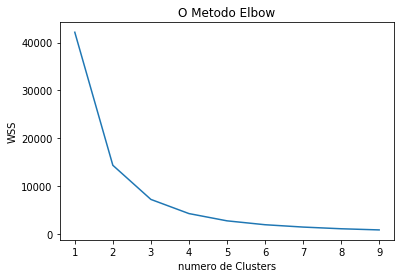

In [9]:
calculoElbow(Xst)

In [10]:
# Utilizando o Kmeans, é realizado a clusterização
# Ou seja, calculo a partir do vizinho mais próximo
# Então é mostrado o centro dos clursters
kmeans = KMeans(n_clusters=4)
kmeans.fit(Xst)
kmeans.cluster_centers_

array([[ 0.22584936],
       [-1.99036541],
       [ 1.12211408],
       [-0.72937886]])

In [11]:
# Clusterização
y_pred = KMeans(n_clusters=4).fit_predict(Xst)
df["cluster"] = y_pred
df.loc[ :, ["country", "cluster", "danceability"]].head()

,country,cluster,danceability
0,BR,2,0.637
1,BR,1,0.746
2,BR,2,0.687
3,BR,3,0.376
4,BR,1,0.847


#### Análise do Brasil

In [13]:
# Divisão do df para a análise do Brasil
dfbr = df[ df.country == "BR"]

In [14]:
dfbr.cluster.value_counts()

2    6109
3    5140
1    4563
0    2116
Name: cluster, dtype: int64

In [15]:
# Divisão do dfbr em df para cada cluster
dfcl0 = dfbr[ dfbr.cluster == 0]
dfcl1 = dfbr[ dfbr.cluster == 1]
dfcl2 = dfbr[ dfbr.cluster == 2]
dfcl3 = dfbr[ dfbr.cluster == 3]

In [16]:
media = dfcl0.danceability.mean(), dfcl1.danceability.mean(), dfcl2.danceability.mean(), dfcl3.danceability.mean()
print(media)

(0.25057986767485896, 0.7936743370589524, 0.6361997053527599, 0.46897373540856013)


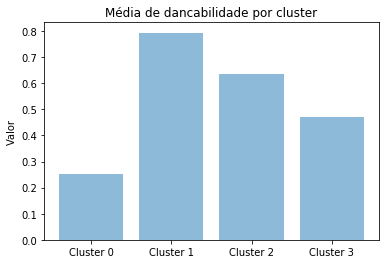

In [17]:
objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = media

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de dancabilidade por cluster')

plt.show()

In [18]:
dfcl0.category.value_counts()[:10]

inspirational    450
sleep            261
popculture       201
classical        170
mood             122
focus            119
chill            113
rock             111
indie_alt         76
gaming            68
Name: category, dtype: int64

In [19]:
dfcl1.category.value_counts()[:10]

summer        441
party         386
hiphop        382
family        355
edm_dance     287
mood          284
popculture    278
sertanejo     225
pop           223
latin         219
Name: category, dtype: int64

In [20]:
dfcl2.category.value_counts()[:10]

mood             551
popculture       431
edm_dance        406
inspirational    399
family           398
sertanejo        359
summer           330
brazilian        315
rock             284
party            261
Name: category, dtype: int64

In [21]:
dfcl3.category.value_counts()[:10]

inspirational    1099
mood              433
rock              431
popculture        369
brazilian         185
summer            178
indie_alt         167
comedy            150
sertanejo         150
sessions          145
Name: category, dtype: int64

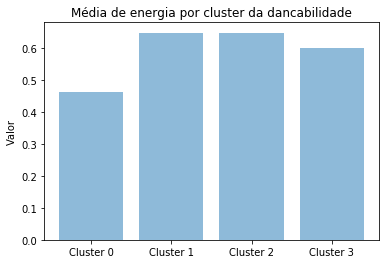

In [22]:
objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0.energy.mean(), dfcl1.energy.mean(), dfcl2.energy.mean(), dfcl3.energy.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de energia por cluster da dancabilidade')

plt.show()

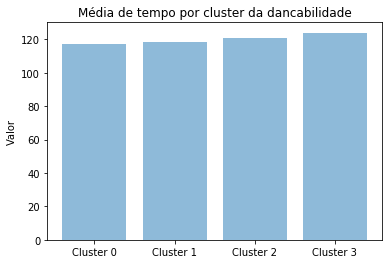

In [23]:
objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0.tempo.mean(), dfcl1.tempo.mean(), dfcl2.tempo.mean(), dfcl3.tempo.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de tempo por cluster da dancabilidade')

plt.show()

In [24]:
dfbr.columns

Index(['artists', 'category', 'country', 'duration_ms', 'name', 'popularity',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'cluster'],
      dtype='object')

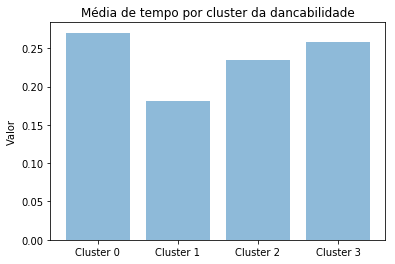

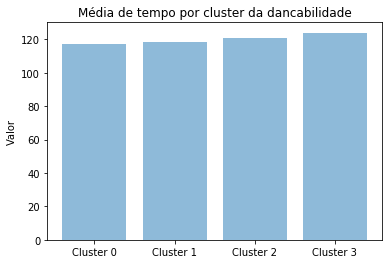

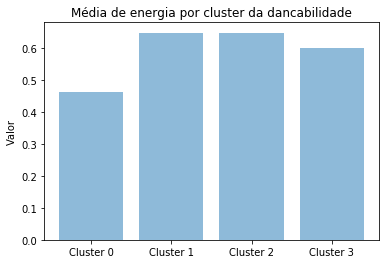

In [27]:
objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0['liveness'].mean(), dfcl1.liveness.mean(), dfcl2.liveness.mean(), dfcl3.liveness.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de tempo por cluster da dancabilidade')

plt.show()

objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0.tempo.mean(), dfcl1.tempo.mean(), dfcl2.tempo.mean(), dfcl3.tempo.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de tempo por cluster da dancabilidade')

plt.show()

objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0.energy.mean(), dfcl1.energy.mean(), dfcl2.energy.mean(), dfcl3.energy.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de energia por cluster da dancabilidade')

plt.show()